In [15]:
#set up dependencies
import pandas as pd
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Generate Cities List

In [3]:
#create list of 500+ random cities

#create random coordinates
lat_list = np.random.uniform(-90.00, 90.00, 1500)
lng_list = np.random.uniform(-180.00, 180.00, 1500)

#combine list to create coodinates
coords_list = list(zip(lat_list, lng_list))

In [4]:
#set up lists for finding cities using citipy
cities = []
countries = []

for coords in coords_list:
    
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    country = citipy.nearest_city(coords[0], coords[1]).country_code
    
    if city not in cities:
        cities.append(city)

len(cities)

577

## Perform API Calls

In [5]:
#perform API calls through OpenWeatherMap API

#create function to extract data from API:
def extract_data(data):
    return {
        "name" : data["name"],
        "lat" : data["coord"]["lat"],
        "lng" : data["coord"]["lon"],
        "max_temp_f" : data["main"]["temp_max"],
        "humidity" : data["main"]["humidity"],
        "cloudiness" : data["clouds"]["all"],
        "windspeed" : data["wind"]["speed"],
        "country" : data["sys"]["country"],
        "date" : data["dt"]
    }

In [6]:
#request data from OpenWeatherMay API calls

#create empty list for appending extracted data
city_results = []

#set beginning print statments for output
print("Beginning Data Retrieval")
print("-" * 30)

#set up record counter for output
record_counter = 1

#create for loop to loop over random city list
for i, city in enumerate(cities):
    
    #set up record counter for print log
    if i > 600:
        record_counter += 1
    
    #set up request and include try/except
    try:
        print(f"Processing Record {record_counter} | {city}")
        
        record_counter += 1
        
        data = requests.get(url = "http://api.openweathermap.org/data/2.5/weather", params = {
            "q": city,
            "appid": weather_api_key,
            "units": "imperial"
        }).json()
    
        cities_result = extract_data(data)
    
        city_results.append(cities_result)
        
    except KeyError:
        print("City Not Found. Skipping ...")
        pass
    
print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | ushuaia
Processing Record 2 | aykhal
Processing Record 3 | rikitea
Processing Record 4 | punta arenas
Processing Record 5 | sinnamary
Processing Record 6 | castro
Processing Record 7 | tuktoyaktuk
Processing Record 8 | ilulissat
Processing Record 9 | primorsko-akhtarsk
Processing Record 10 | kitimat
Processing Record 11 | scarborough
Processing Record 12 | kurilsk
Processing Record 13 | morondava
Processing Record 14 | mastic beach
Processing Record 15 | kapaa
Processing Record 16 | jamestown
Processing Record 17 | santa fe
Processing Record 18 | caravelas
Processing Record 19 | sola
Processing Record 20 | bambous virieux
Processing Record 21 | saint-augustin
Processing Record 22 | mallaig
Processing Record 23 | busselton
Processing Record 24 | padang
Processing Record 25 | rio gallegos
Processing Record 26 | chenzhou
Processing Record 27 | atuona
Processing Record 28 | nikolskoye
Processing Record 29 | ribei

## Convert Raw Data to a Dataframe

In [9]:
#convert data to a data frame
city_df = pd.DataFrame(city_results)

#export df to CSV
city_df.to_csv("cities_data.csv", index=False)

#show dataframe
city_df

,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date
0,Ushuaia,-54.80,-68.30,51.80,77,75,19.46,AR,1600878403
1,Aykhal,66.00,111.50,42.80,52,20,6.71,RU,1600878403
2,Rikitea,-23.12,-134.97,72.03,74,4,14.18,PF,1600878404
3,Punta Arenas,-53.15,-70.92,53.60,54,75,29.97,CL,1600878185
4,Sinnamary,5.38,-52.95,86.70,61,98,13.35,GF,1600878404
...,...,...,...,...,...,...,...,...,...
524,Mishelevka,52.86,103.17,45.93,70,25,12.93,RU,1600878528
525,Fjerritslev,57.08,9.27,64.00,82,81,5.99,DK,1600878529
526,Ruiru,-1.16,36.96,77.00,44,40,10.29,KE,1600878529
527,Olinda,-8.01,-34.86,84.20,62,40,10.29,BR,1600878529


## Plotting Weather Data

### Latitude vs. Temperature

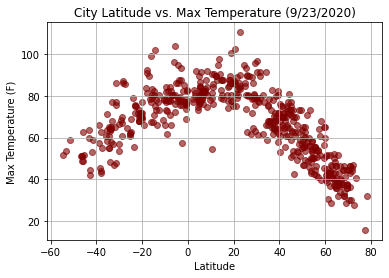

In [42]:
#create variables for plotting
lat = city_df["lat"]
temp = city_df["max_temp_f"]

plt.scatter(lat, temp, color="maroon", alpha=0.6)
plt.title("City Latitude vs. Max Temperature (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/max_temp_plot.png")
plt.show()

#### The scatter plot above analyzes the maximum temperate of over 500 random cities vs each citys respective latitude. This graph show that cities closer to the equator (latitude of 0) have higher max temperatures.

### Latitude vs. Humidity

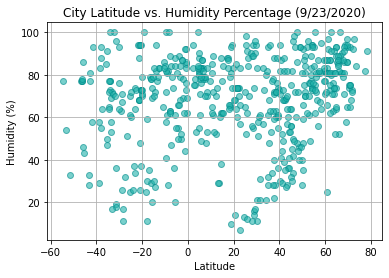

In [44]:
#create variables for plotting
humidity = city_df["humidity"]

#build scatter plot
plt.scatter(lat, humidity, color="lightseagreen", edgecolors="darkcyan", alpha=0.6)
plt.title("City Latitude vs. Humidity Percentage (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/humidity_plot.png")
plt.show()

#### The scatter plot above analyzes the humidity percentage vs latitude for 500 random cities. The data does not immediately show a correlation with humidity and latitude. High humidity appears across all latitude points with large clusters around 0 degrees latitude and 60 degrees latitdue in cities that have around 80% humidity. 

### Latitude vs. Cloudiness

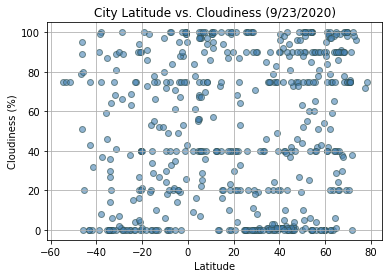

In [45]:
#create variables for plotting
cloudiness = city_df["cloudiness"]

#build scatter plot
plt.scatter(lat, cloudiness, color="steelblue", edgecolors="darkslategray", alpha=0.6)
plt.title("City Latitude vs. Cloudiness (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/cloudiness_plot.png")
plt.show()

#### The scatter plot above analyzes the cloudiness percentage vs latitude for 500 random cities. When compared across latitude, cloudiness percentage appears to be dispersed across the entire percentage range for all latitudes. Cloudiness does not immediatly show a correlation when compared to latitude. 

### Latitude vs. Wind Speed

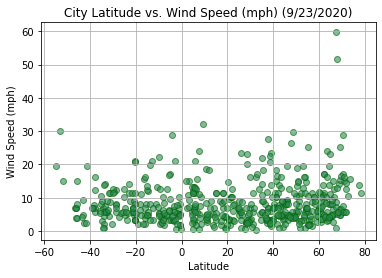

In [48]:
#create variables for plotting
wind_speed = city_df["windspeed"]

#build scatter plot
plt.scatter(lat, wind_speed, color="seagreen", edgecolors="darkgreen", alpha=0.6)
plt.title("City Latitude vs. Wind Speed (mph) (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/windspeed_plot.png")
plt.show()

#### The above scatter plot analyzes wind speed for over 500 random cities vs the respective latitude for each city. The data show that across all latitude points, most cities have wind speeds under 10 mph and the overall majority have wind speeds under 30 mph. There are two extreme outliers of cities with wind speed above 50 mph around 70 degrees latitude. 

In [65]:
#create northern and southern hemispheres for plotting. 
southern_hem = city_df[city_df["lat"] < 0]
northern_hem = city_df[city_df["lat"] >= 0]

#create lat variables to use for each plot category
southern_lat = southern_hem["lat"]
northern_lat = northern_hem["lat"]

## Linear Regression

### Northern Hemisphere - Temperature (F) vs. Latitude

In [77]:
#create variables for plotting
northern_temp = northern_hem["max_temp_f"]

#create x and y for training the model
X_NT = [[e] for e in northern_lat]
y_nt = northern_temp

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NT, y_nt)

#create predict funtion for plotting
def predict_function_nt(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nt = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_temp = [predict_function_nt(e) for e in x_range_nt]

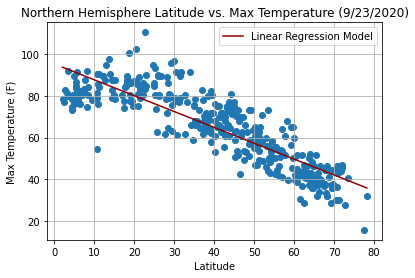

In [78]:
#create plot
plt.scatter(northern_lat, northern_temp)
plt.title("Northern Hemisphere Latitude vs. Max Temperature (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.plot(x_range_nt, predict_northern_temp, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_maxtemp_plot.png")
plt.show()

In [ ]:
#### analysis

### Southern Hemisphere - Temperature (F) vs. Latitude

In [79]:
#create variables for plotting
southern_temp = southern_hem["max_temp_f"]

#create x and y for training the model
X_ST = [[e] for e in southern_lat]
y_st = southern_temp

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_ST, y_st)

#create predict funtion for plotting
def predict_function_st(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_st = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_temp = [predict_function_st(e) for e in x_range_st]

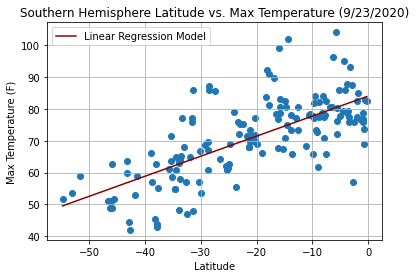

In [80]:
#create plot
plt.scatter(southern_lat, southern_temp)
plt.title("Southern Hemisphere Latitude vs. Max Temperature (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.plot(x_range_st, predict_southern_temp, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_maxtemp_plot.png")
plt.show()

In [ ]:
#### analysis

### Northern Hemisphere - Humidity (%) vs. Latitude

In [81]:
#create variables for plotting
northern_humidity = northern_hem["humidity"]

#create x and y for training the model
X_NH = [[e] for e in northern_lat]
y_nh = northern_humidity

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NH, y_nh)

#create predict funtion for plotting
def predict_function_nh(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nh = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_humidity = [predict_function_nh(e) for e in x_range_nh]

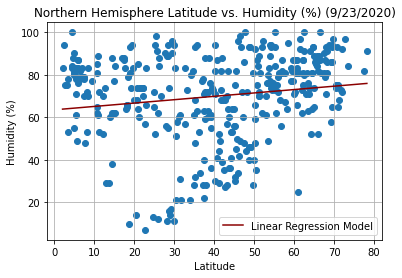

In [82]:
#create plot
plt.scatter(northern_lat, northern_humidity)
plt.title("Northern Hemisphere Latitude vs. Humidity (%) (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.plot(x_range_nh, predict_northern_humidity, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_humidity_plot.png")
plt.show()

In [ ]:
#### analysis

### Southern Hemisphere - Humidity (%) vs. Latitude

In [83]:
#create variables for plotting
southern_humidity = southern_hem["humidity"]

#create x and y for training the model
X_SH = [[e] for e in southern_lat]
y_sh = southern_humidity

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_SH, y_sh)

#create predict funtion for plotting
def predict_function_sh(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_sh = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_humidity = [predict_function_sh(e) for e in x_range_sh]

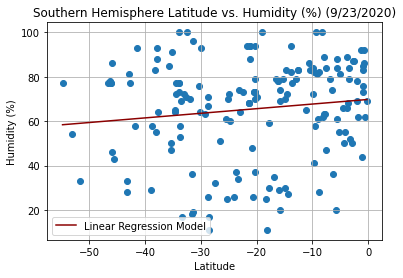

In [85]:
#create plot
plt.scatter(southern_lat, southern_humidity)
plt.title("Southern Hemisphere Latitude vs. Humidity (%) (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.plot(x_range_sh, predict_southern_humidity, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_humidity_plot.png")
plt.show()

In [ ]:
#### analysis

### Northern Hemisphere - Cloudiness (%) vs. Latitude

In [86]:
#create variables for plotting
northern_cloudiness = northern_hem["cloudiness"]

#create x and y for training the model
X_NC = [[e] for e in northern_lat]
y_nc = northern_cloudiness

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NC, y_nc)

#create predict funtion for plotting
def predict_function_nc(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nc = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_cloudiness = [predict_function_nc(e) for e in x_range_nc]

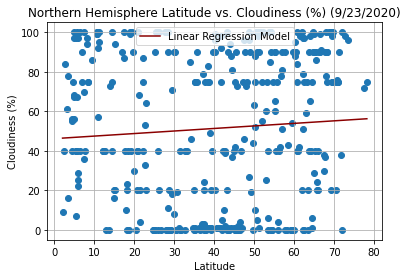

In [87]:
#create plot
plt.scatter(northern_lat, northern_cloudiness)
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%) (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.plot(x_range_nc, predict_northern_cloudiness, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_cloudiness_plot.png")
plt.show()

In [ ]:
#### analysis

### Southern Hemisphere - Cloudiness (%) vs. Latitude

In [90]:
#create variables for plotting
southern_cloudiness = southern_hem["cloudiness"]

#create x and y for training the model
X_SC = [[e] for e in southern_lat]
y_sc = southern_cloudiness

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_SC, y_sc)

#create predict funtion for plotting
def predict_function_sc(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_sc = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_cloudiness = [predict_function_sc(e) for e in x_range_sc]

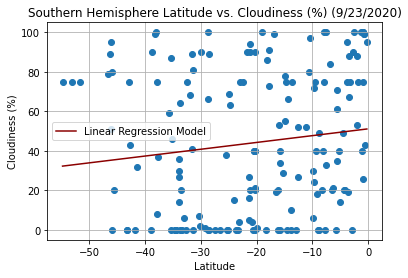

In [91]:
#create plot
plt.scatter(southern_lat, southern_cloudiness)
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%) (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.plot(x_range_sc, predict_southern_cloudiness, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_cloudiness_plot.png")
plt.show()

In [ ]:
#### analysis

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
#### analysis

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [58]:
#### analysis